In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
from google.colab import files
Uploaded = files.upload()

Saving Zomato Restaurant names and Metadata.csv to Zomato Restaurant names and Metadata.csv


In [4]:
data = pd.read_csv("Zomato Restaurant names and Metadata.csv")
data.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# Clean 'Cost' column (removes commas, trims spaces, converts to float)
data['Cost'] = data['Cost'].astype(str).str.replace(',', '').str.strip()
data['Cost'] = pd.to_numeric(data['Cost'], errors='coerce')

# Drop rows where 'Cost' or 'Cuisines' are missing, since they're essential for clustering
data = data.dropna(subset=['Cost', 'Cuisines']).reset_index(drop=True)


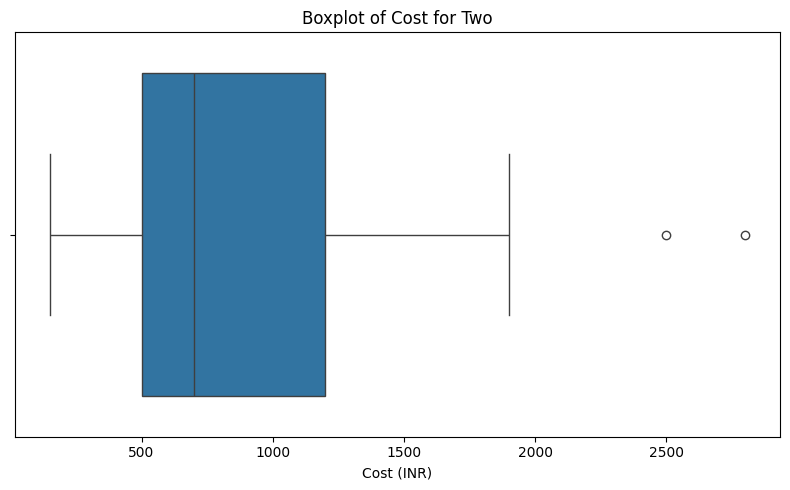

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Cost'].dropna())
plt.title('Boxplot of Cost for Two')
plt.xlabel('Cost (INR)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-3542082834.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_cuisines, y='Cuisine', x='Count', palette='viridis')


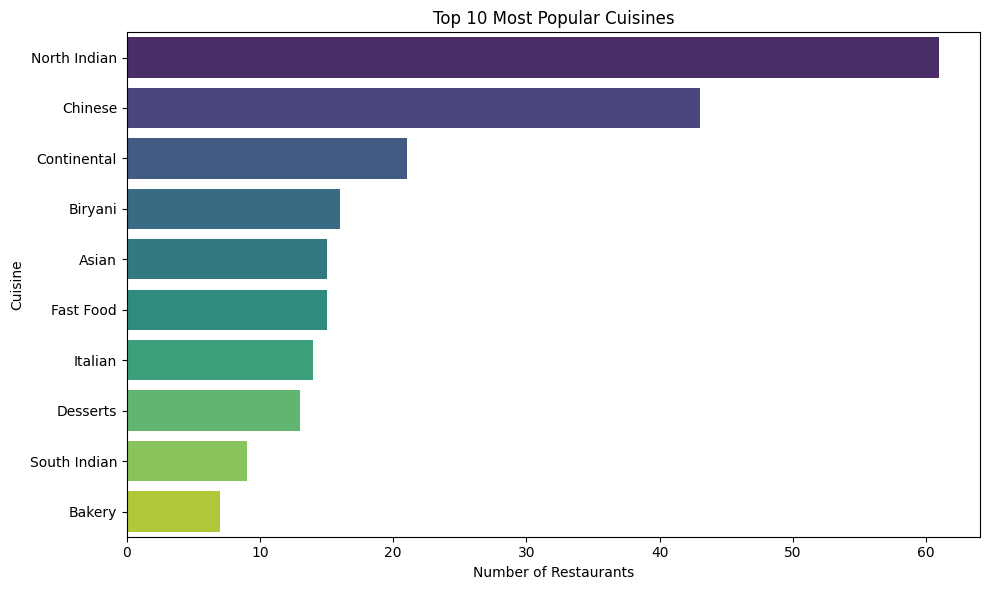

In [7]:
from collections import Counter

# Split cuisines into a list for all restaurants
cuisine_list = []
for x in data['Cuisines'].dropna():
    cuisine_list.extend([c.strip() for c in str(x).split(',')])

cuisine_counts = Counter(cuisine_list)
top10_cuisines = pd.DataFrame(cuisine_counts.most_common(10), columns=['Cuisine', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_cuisines, y='Cuisine', x='Count', palette='viridis')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


In [8]:
# One-hot encoding of 'Cuisines'
cuisine_dummies = data['Cuisines'].str.get_dummies(sep=', ')
# Combine cost and cuisines into one feature set
features = pd.concat([data[['Cost']], cuisine_dummies], axis=1)


In [9]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [10]:
# Choose 5 clusters as a practical example
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_scaled)


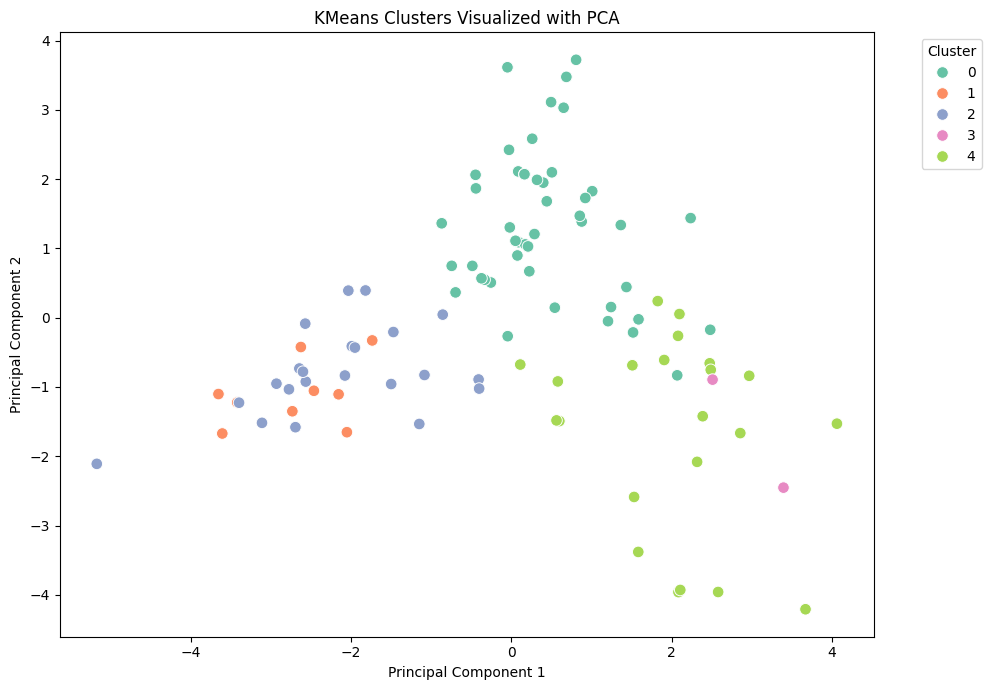

In [11]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='Set2', s=70)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
# Print size and top cuisines for each cluster
for c in sorted(data['Cluster'].unique()):
    print(f"\nCluster {c}:")
    cluster_df = data[data['Cluster'] == c]
    print(f"  Count: {len(cluster_df)}")
    print(f"  Median Cost: {cluster_df['Cost'].median()} INR")
    # Top 3 cuisines in this cluster
    cuisines_in_cluster = []
    for items in cluster_df['Cuisines']:
        cuisines_in_cluster.extend([c.strip() for c in items.split(',')])
    top_cuisines = Counter(cuisines_in_cluster).most_common(3)
    print("  Top Cuisines:", ', '.join([f"{x[0]} ({x[1]})" for x in top_cuisines]))



Cluster 0:
  Count: 50
  Median Cost: 700.0 INR
  Top Cuisines: North Indian (46), Chinese (33), Biryani (15)

Cluster 1:
  Count: 9
  Median Cost: 600.0 INR
  Top Cuisines: Desserts (6), Bakery (6), Cafe (4)

Cluster 2:
  Count: 22
  Median Cost: 450.0 INR
  Top Cuisines: Fast Food (11), Desserts (6), Burger (4)

Cluster 3:
  Count: 2
  Median Cost: 1700.0 INR
  Top Cuisines: North Indian (2), Japanese (2), Sushi (2)

Cluster 4:
  Count: 22
  Median Cost: 1400.0 INR
  Top Cuisines: Asian (14), Continental (14), North Indian (11)
